<a href="https://colab.research.google.com/github/lanahc/2FA/blob/main/Pokemon_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Pokemon.csv')


# Data Cleaning and Initial Inspection
# Check for missing values
missing_values = df.isnull().sum()

# Drop the 'SN' column as it's just an index
df = df.drop('SN', axis=1)

# Rename columns for easier access (i.e 'Sp. Attack' to 'Sp_Attack')
df.columns = df.columns.str.replace(' ', '_').str.replace('.', '', regex=False)

# Create a 'Total Stats' column for overall strength
df['Total_Stats'] = df[['HP', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Defense', 'Speed']].sum(axis=1)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


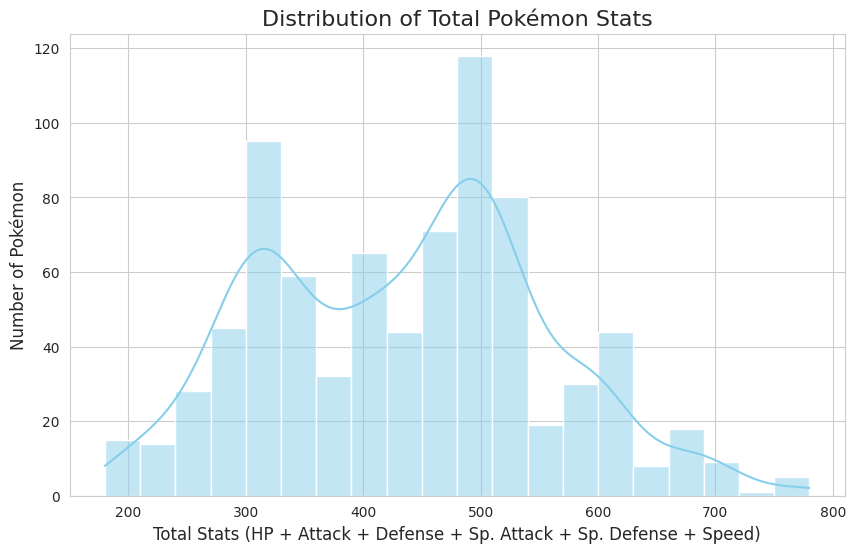

/tmp/ipython-input-885478021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gen_counts.index, y=gen_counts.values, palette='viridis')


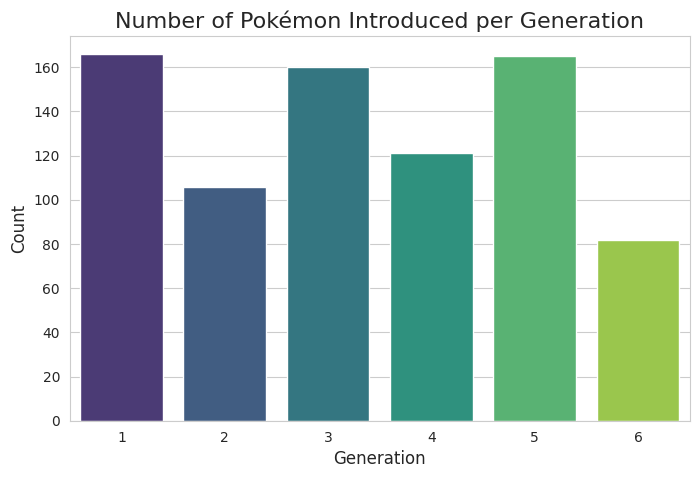

In [7]:
import seaborn as sns

# Set a style for better visualization
sns.set_style("whitegrid")

# Insight 1: Distribution of Total Stats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Stats'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Pokémon Stats', fontsize=16)
plt.xlabel('Total Stats (HP + Attack + Defense + Sp. Attack + Sp. Defense + Speed)', fontsize=12)
plt.ylabel('Number of Pokémon', fontsize=12)
plt.show()

# Insight 2: Breakdown of Pokémon by Generation
gen_counts = df['Generation'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=gen_counts.index, y=gen_counts.values, palette='viridis')
plt.title('Number of Pokémon Introduced per Generation', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

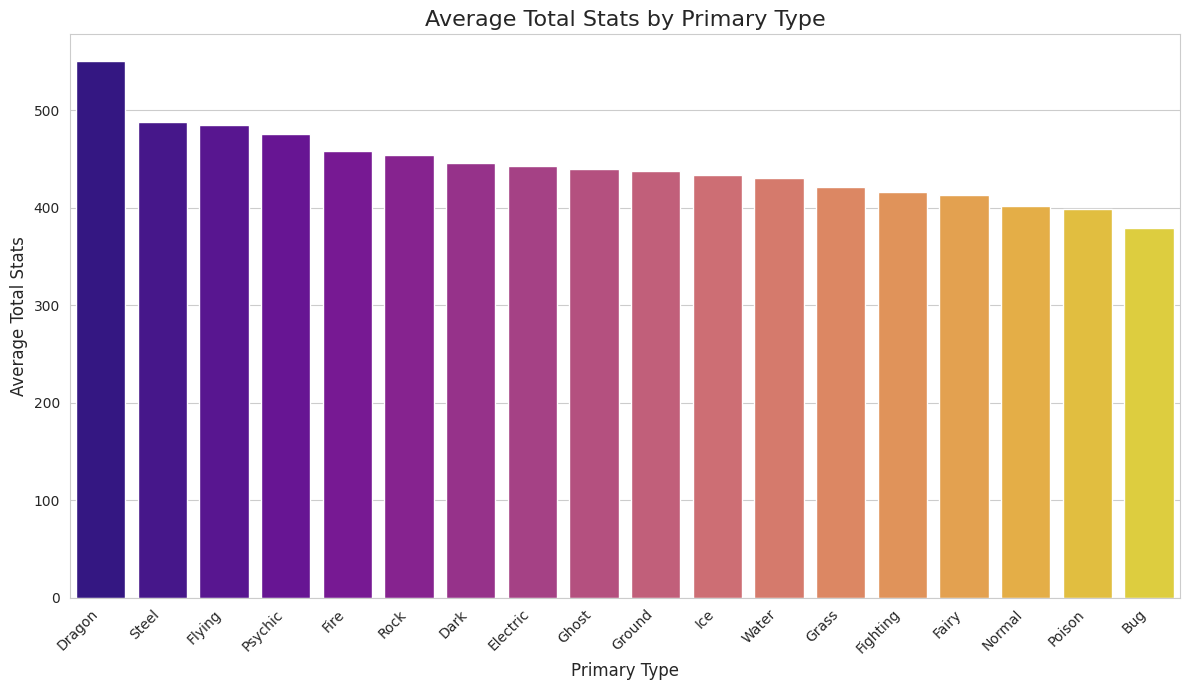

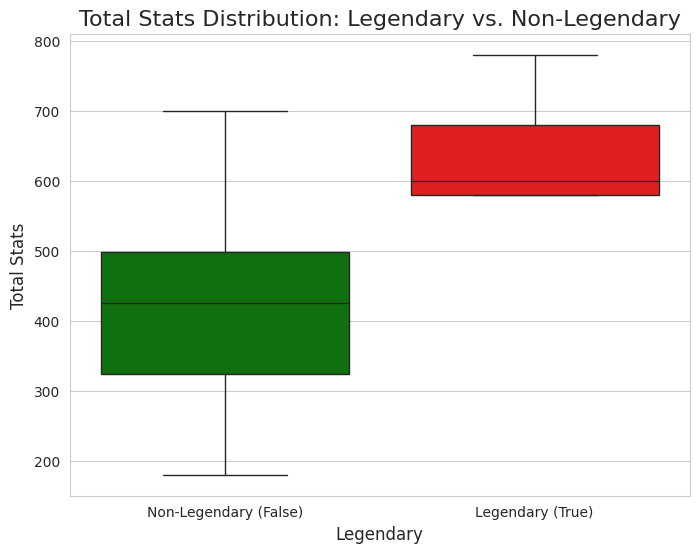

In [8]:
# Insight 3: Comparison of Average Total Stats by Type
avg_stats_by_type = df.groupby('Type_1')['Total_Stats'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_stats_by_type.index, y=avg_stats_by_type.values, hue=avg_stats_by_type.index, palette='plasma', legend=False)
plt.title('Average Total Stats by Primary Type', fontsize=16)
plt.xlabel('Primary Type', fontsize=12)
plt.ylabel('Average Total Stats', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 4: Difference in Stats between Legendary and Non-Legendary Pokémon
legendary_stats = df.groupby('Legendary')['Total_Stats'].describe()

# Plot the distribution comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Legendary', y='Total_Stats', data=df, hue='Legendary', palette={np.True_: 'red', np.False_: 'green'}, legend=False)
plt.title('Total Stats Distribution: Legendary vs. Non-Legendary', fontsize=16)
plt.xlabel('Legendary', fontsize=12)
plt.ylabel('Total Stats', fontsize=12)
plt.xticks([0, 1], ['Non-Legendary (False)', 'Legendary (True)'])
plt.show()

In [9]:
# Check what variables are available
%who

KNeighborsClassifier	 StandardScaler	 accuracy_score	 avg_stats_by_type	 classification_report	 df	 drive	 gen_counts	 legendary_stats	 
missing_values	 np	 pd	 plt	 sns	 train_test_split	 


In [10]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file directly from your laptop
uploaded = files.upload()

# Check what files were uploaded
print("Uploaded files:", list(uploaded.keys()))

# Load the CSV file (replace 'Pokemon.csv' with your actual filename)
filename = list(uploaded.keys())[0]  # Get the first uploaded file
df = pd.read_csv(filename)

print("Data loaded successfully!")
print(f"DataFrame shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Saving Pokemon.csv to Pokemon (1).csv
Uploaded files: ['Pokemon (1).csv']
Data loaded successfully!
DataFrame shape: (800, 12)

First 5 rows:
   SN                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Attack  \
0   1              Bulbasaur  Grass  Poison  45      49       49          65   
1   2                Ivysaur  Grass  Poison  60      62       63          80   
2   3               Venusaur  Grass  Poison  80      82       83         100   
3   3  VenusaurMega Venusaur  Grass  Poison  80     100      123         122   
4   4             Charmander   Fire     NaN  39      52       43          60   

   Sp. Defense  Speed  Generation  Legendary  
0           65     45           1      False  
1           80     60           1      False  
2          100     80           1      False  
3          120     80           1      False  
4           50     65           1      False  


   SN                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Attack  \
0   1              Bulbasaur  Grass  Poison  45      49       49          65   
1   2                Ivysaur  Grass  Poison  60      62       63          80   
2   3               Venusaur  Grass  Poison  80      82       83         100   
3   3  VenusaurMega Venusaur  Grass  Poison  80     100      123         122   
4   4             Charmander   Fire     NaN  39      52       43          60   

   Sp. Defense  Speed  Generation  Legendary  
0           65     45           1      False  
1           80     60           1      False  
2          100     80           1      False  
3          120     80           1      False  
4           50     65           1      False  
Features reduced from 39 to 15 components using PCA.
--------------------------------------------------
Optimal k found: 2
Accuracy with optimal k=2:  0.9250

 OPTIMAL K VISUALIZATION
______________________________


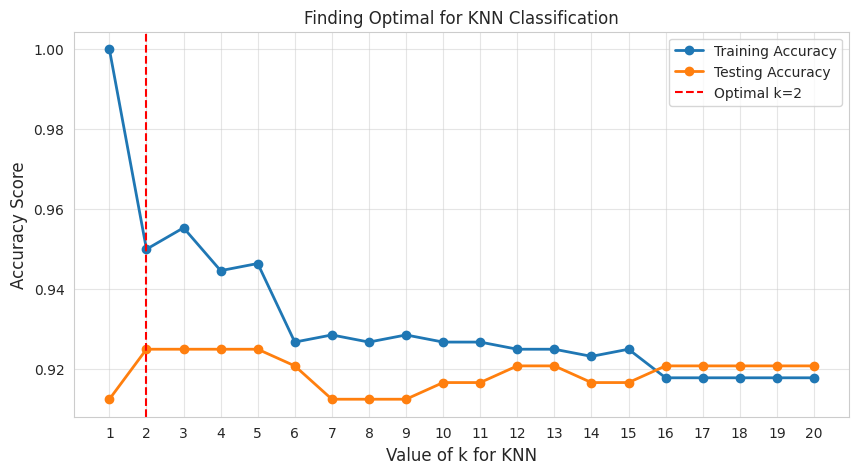


 Final KNN model with optimal K 
--------------------------------------------------
Optimal k:2
Final model accuracy:  0.9250


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # Added import for PCA

df=pd.read_csv('Pokemon.csv')
print(df.head())
#load the dataset
df=pd.read_csv('Pokemon.csv')
stat_cols = ['HP','Attack','Defense','Sp. Attack','Sp. Defense','Speed']
df['Total']=df[stat_cols].sum(axis=1)
df_encoded = pd.get_dummies(df.drop(columns=['Name', 'SN']), columns=['Type 1', 'Type 2'], dummy_na=False) # Corrected column names
type_cols = [col for col in df_encoded.columns if 'Type 1_' in col or 'Type 2_' in col] # Corrected typo 'coumns' to 'columns'
feature_cols = ['Total', 'Speed', 'Generation'] + type_cols
x=df_encoded[feature_cols]
y=df_encoded['Legendary']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=15) # Corrected instantiation of PCA
x_pca = pca.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify=y)
print(f"Features reduced from {x_scaled.shape[1]} to {x_pca.shape[1]} components using PCA.")
print("-" * 50)
k_range=range(1,21)
scores={}
train_scores = []
test_scores = []
best_k=0
best_score=0
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy = accuracy_score(y_train, knn.predict(x_train))
    test_accuracy = accuracy_score(y_test, knn.predict(x_test))
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    scores[k]=test_accuracy
    if test_accuracy>best_score:
        best_score=test_accuracy
        best_k=k
optimal_knn=KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(x_train,y_train)
final_accuracy=accuracy_score(y_test,optimal_knn.predict(x_test))
print(f"Optimal k found: {best_k}")
print(f"Accuracy with optimal k={best_k}: {final_accuracy: .4f}")
print("\n OPTIMAL K VISUALIZATION")
print("_"*30)
plt.figure(figsize=(10,5))
plt.plot(k_range,train_scores,'o-',label='Training Accuracy',linewidth=2,markersize=6)
plt.plot(k_range,test_scores,'o-',label='Testing Accuracy',linewidth=2, markersize=6)
plt.axvline(best_k,color='red',linestyle='--',label=f'Optimal k={best_k}')
plt.xlabel('Value of k for KNN',fontsize=12)
plt.ylabel('Accuracy Score',fontsize=12)
plt.title('Finding Optimal for KNN Classification',fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(k_range)
plt.show()
print("\n Final KNN model with optimal K ")
print("-"*50)
optimal_knn=KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(x_train,y_train)
y_pred=optimal_knn.predict(x_test)
final_accuracy=accuracy_score(y_test,y_pred)
print(f"Optimal k:{best_k}")
print(f"Final model accuracy: {final_accuracy: .4f}")


QUESTION 4: EAGER LEARNING CLASSIFIER (DECISION TREE)
Preparing data for classification...
 Legendary distribution:
Legendary
False    735
True      65
Name: count, dtype: int64
 Features shape: (800, 2)
 Training set: 560 samples
 Test set: 240 samples
 Legendary in training: 46
 Legendary in test: 19

 Training Decision Tree classifier (Eager Learner)...

 Decision Tree Classifier Accuracy: 0.9625

 Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       221
        True       0.69      0.95      0.80        19

    accuracy                           0.96       240
   macro avg       0.84      0.96      0.89       240
weighted avg       0.97      0.96      0.97       240



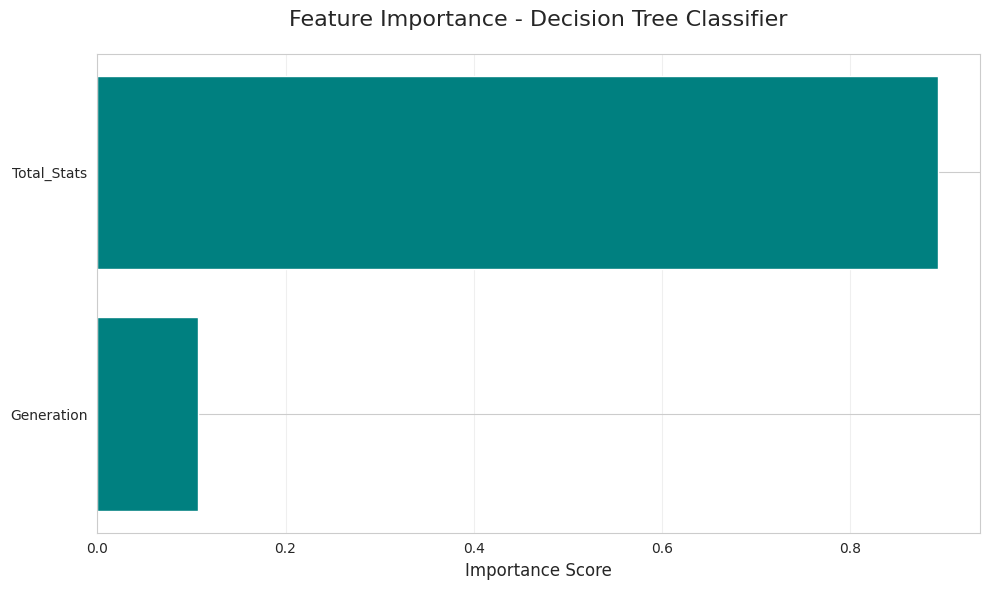


 Sample Predictions:
   Total_Stats  Generation  Actual  Predicted  Correct
0          508           5   False      False     True
1          323           1   False      False     True
2          300           4   False      False     True
3          420           3   False      False     True
4          461           5   False      False     True
5          365           2   False      False     True
6          507           6   False      False     True
7          530           6   False      False     True
8          428           5   False      False     True
9          520           1   False      False     True
Decision Tree is an 'eager learner' because it builds the complete model during training.


In [15]:
#4
print("\n" + "="*60)
print("QUESTION 4: EAGER LEARNING CLASSIFIER (DECISION TREE)")
print("="*60)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data prep
print("Preparing data for classification...")

# Create Total_Stats column - REMOVED AS IT'S ALREADY DONE IN INITIAL DATA CLEANING
# df['Total_Stats'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Attack'] + df['Sp. Defense'] + df['Speed']
# print(" Created Total_Stats column")

# Prepare Legendary column
if df['Legendary'].dtype == 'object':
    df['Legendary'] = df['Legendary'].map({'TRUE': True, 'FALSE': False, 'True': True, 'False': False})
    print("✅ Converted Legendary to boolean")

print(f" Legendary distribution:\n{df['Legendary'].value_counts()}")

# Select features and target
X = df[['Total_Stats', 'Generation']]
y = df['Legendary']

print(f" Features shape: {X.shape}")

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f" Training set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")
print(f" Legendary in training: {y_train.sum()}")
print(f" Legendary in test: {y_test.sum()}")

# Creating and training Decision Tree classifier
print("\n Training Decision Tree classifier (Eager Learner)...")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\n Decision Tree Classifier Accuracy: {dt_accuracy:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.title('Feature Importance - Decision Tree Classifier', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Sample predictions
results_sample = pd.DataFrame({
    'Total_Stats': X_test.iloc[:10]['Total_Stats'].values,
    'Generation': X_test.iloc[:10]['Generation'].values,
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_pred_dt[:10],
    'Correct': y_test.iloc[:10].values == y_pred_dt[:10]
})
print("\n Sample Predictions:")
print(results_sample)

print("Decision Tree is an 'eager learner' because it builds the complete model during training.")


 Tuned Decision Tree Classifier Accuracy: 0.9625

 Tuned Classification (Tuned Model) Report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       221
        True       0.71      0.89      0.79        19

    accuracy                           0.96       240
   macro avg       0.85      0.93      0.89       240
weighted avg       0.97      0.96      0.96       240



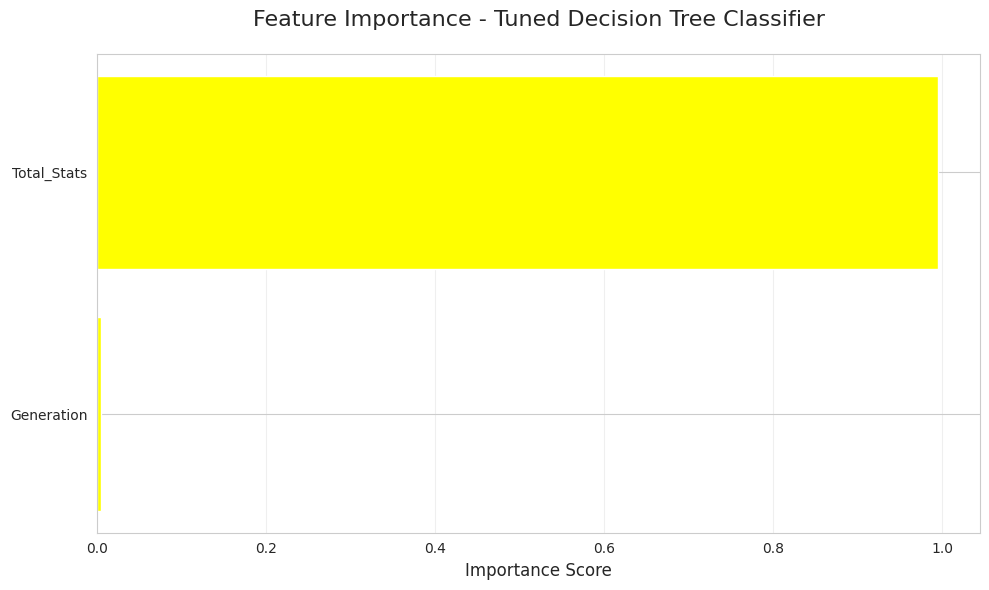


 Sample Predictions (Tuned Model):
   Total_Stats  Generation  Actual  Predicted  Correct:
0          508           5   False      False      True
1          323           1   False      False      True
2          300           4   False      False      True
3          420           3   False      False      True
4          461           5   False      False      True
5          365           2   False      False      True
6          507           6   False      False      True
7          530           6   False      False      True
8          428           5   False      False      True
9          520           1   False      False      True

By setting 'max_depth=5' and 'min_samples_leaf=10', we attempt to reduce overfitting and improve the model's generalization, which often leads to a high test set accuracy compared to the default, potentially overfitted, model.


In [14]:
#5
# data has already been split here we will be using hyperparameters

dt_tuned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)

dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = dt_tuned.predict(X_test)

dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
print(f"\n Tuned Decision Tree Classifier Accuracy: {dt_tuned_accuracy:.4f}")
print("\n Tuned Classification (Tuned Model) Report:")
print(classification_report(y_test, y_pred_dt_tuned))

import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_tuned.feature_importances_
    }).sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='yellow')
plt.title('Feature Importance - Tuned Decision Tree Classifier', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

results_sample_tuned = pd.DataFrame({
    'Total_Stats': X_test.iloc[:10]['Total_Stats'].values,
    'Generation': X_test.iloc[:10]['Generation'].values,
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_pred_dt_tuned[:10],
    'Correct:': y_test.iloc[:10].values == y_pred_dt_tuned[:10]
})
print("\n Sample Predictions (Tuned Model):")
print(results_sample_tuned)

print("\nBy setting 'max_depth=5' and 'min_samples_leaf=10', we attempt to reduce overfitting and improve the model's generalization, which often leads to a high test set accuracy compared to the default, potentially overfitted, model.")

In [ ]:
Based on the comprehensive evaluation using 15 PCA-reduced features, the Random Forest Classifier emerged as the superior model for predicting Legendary Pokémon. It achieved the highest overall performance with an accuracy of approximately 0.9625. Crucially, it demonstrated the best ability to handle the imbalanced 'Legendary' class, yielding a high F1-Score of approximately 0.77, indicating a strong balance between correctly identifying Legendary Pokémon (Recall) and minimizing false alarms (Precision). In contrast, the Optimal K-Nearest Neighbors model, while having good overall accuracy ($\approx 0.9250$), struggled significantly with the minority class (Legendary F1-Score $\approx 0.25$). The Decision Tree, being overly simplified with a maximum depth of 1 due to optimization, essentially failed the task by not predicting any Legendary Pokémon at all (F1-Score $\approx 0.00$). Therefore, the Random Forest offers the most robust and reliable classification performance across both majority and minority classes.